In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

In [121]:
#load data
df=pd.read_csv('TESLA STOCK.csv')

In [122]:
df.head(5)

,date,close,volume,open,high,low
0,16:00,315.14,"8,584,640",327.050,330.29,311.869
1,2018/12/20,315.38,9049389.0000,327.054,330.29,311.869
2,2018/12/19,332.97,8256374.0000,337.600,347.01,329.740
3,2018/12/18,337.03,7084887.0000,350.540,351.55,333.690
4,2018/12/17,348.42,7664832.0000,362.000,365.70,343.880


In [123]:
#it removes the first row
df=df.drop(df.index[0])
df.head(5)

,date,close,volume,open,high,low
1,2018/12/20,315.38,9049389.0000,327.054,330.29,311.869
2,2018/12/19,332.97,8256374.0000,337.600,347.01,329.740
3,2018/12/18,337.03,7084887.0000,350.540,351.55,333.690
4,2018/12/17,348.42,7664832.0000,362.000,365.70,343.880
5,2018/12/14,365.71,6327625.0000,375.000,377.87,364.330


In [124]:
#drop date col
df=df.drop(['date'],axis=1)
df.head(5)

,close,volume,open,high,low
1,315.38,9049389.0000,327.054,330.29,311.869
2,332.97,8256374.0000,337.600,347.01,329.740
3,337.03,7084887.0000,350.540,351.55,333.690
4,348.42,7664832.0000,362.000,365.70,343.880
5,365.71,6327625.0000,375.000,377.87,364.330


In [125]:
#dataset split in feature and label
feature=df.iloc[:,1:]
feature[:5]

,volume,open,high,low
1,9049389.0000,327.054,330.29,311.869
2,8256374.0000,337.600,347.01,329.740
3,7084887.0000,350.540,351.55,333.690
4,7664832.0000,362.000,365.70,343.880
5,6327625.0000,375.000,377.87,364.330


In [126]:
label=df.iloc[:,0]
label.head(5)

1    315.38
2    332.97
3    337.03
4    348.42
5    365.71
Name: close, dtype: float64

In [127]:
#convert feature and label in numpy array
feature=feature.values
feature=feature.astype('float32')

In [128]:
feature[:5]

array([[9.049389e+06, 3.270540e+02, 3.302900e+02, 3.118690e+02],
       [8.256374e+06, 3.376000e+02, 3.470100e+02, 3.297400e+02],
       [7.084887e+06, 3.505400e+02, 3.515500e+02, 3.336900e+02],
       [7.664832e+06, 3.620000e+02, 3.657000e+02, 3.438800e+02],
       [6.327625e+06, 3.750000e+02, 3.778700e+02, 3.643300e+02]],
      dtype=float32)

In [129]:
# scaling your dataset
# i will use MinMaxScalar
scaler = MinMaxScaler(feature_range=(0, 1))
feature=scaler.fit_transform(feature)

In [130]:
feature[:5]

array([[0.19571155, 0.5996158 , 0.58173966, 0.53873754],
       [0.16972917, 0.6876826 , 0.7238803 , 0.6889391 ],
       [0.1313465 , 0.7957411 , 0.7624755 , 0.72213817],
       [0.15034786, 0.8914404 , 0.88276815, 0.8077829 ],
       [0.10653553, 1.        , 0.986228  , 0.9796603 ]], dtype=float32)

In [131]:
#convert label in numpy array
label=label.values

In [132]:
label[:5]

array([315.38, 332.97, 337.03, 348.42, 365.71])

In [133]:
#split your dataset
x_train, x_test, y_train, y_test = train_test_split(feature,label, test_size=0.3, random_state=42)

In [134]:
x_train.shape,y_train.shape

((44, 4), (44,))

In [135]:
x_test.shape,y_test.shape

((20, 4), (20,))

In [136]:
#now i will perform reshape method 
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [137]:
x_train.shape,x_test.shape

((44, 1, 4), (20, 1, 4))

In [138]:
#create model
model=Sequential()
#input shape will be (1,number of feature)
model.add(LSTM(64,input_shape=(1,x_train.shape[2])))
model.add(Dense(1))

In [139]:
#compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')
#fit the model
his=model.fit(x_train,y_train,epochs=250,batch_size=1,verbose=1)

Epoch 1/250
44/44 [==============================] - 1s 23ms/step - loss: 9038.3291
Epoch 2/250
44/44 [==============================] - 0s 2ms/step - loss: 161.0361
Epoch 3/250
44/44 [==============================] - 0s 2ms/step - loss: 153.2726
Epoch 4/250
44/44 [==============================] - 0s 2ms/step - loss: 91.6903
Epoch 5/250
44/44 [==============================] - 0s 2ms/step - loss: 84.6518
Epoch 6/250
44/44 [==============================] - 0s 2ms/step - loss: 108.5190
Epoch 7/250
44/44 [==============================] - 0s 2ms/step - loss: 94.2745
Epoch 8/250
44/44 [==============================] - 0s 2ms/step - loss: 75.7424
Epoch 9/250
44/44 [==============================] - 0s 2ms/step - loss: 45.6020
Epoch 10/250
44/44 [==============================] - 0s 2ms/step - loss: 67.4557
Epoch 11/250
44/44 [==============================] - 0s 2ms/step - loss: 62.3979
Epoch 12/250
44/44 [==============================] - 0s 2ms/step - loss: 69.9160
Epoch 13/250
44/44 

44/44 [==============================] - 0s 3ms/step - loss: 29.9070
Epoch 101/250
44/44 [==============================] - 0s 2ms/step - loss: 30.2534
Epoch 102/250
44/44 [==============================] - 0s 2ms/step - loss: 35.8645
Epoch 103/250
44/44 [==============================] - 0s 3ms/step - loss: 28.4967
Epoch 104/250
44/44 [==============================] - 0s 3ms/step - loss: 26.8232
Epoch 105/250
44/44 [==============================] - 0s 3ms/step - loss: 27.8850
Epoch 106/250
44/44 [==============================] - 0s 3ms/step - loss: 28.5973
Epoch 107/250
44/44 [==============================] - 0s 2ms/step - loss: 22.4234
Epoch 108/250
44/44 [==============================] - 0s 3ms/step - loss: 23.3251
Epoch 109/250
44/44 [==============================] - 0s 3ms/step - loss: 21.0042
Epoch 110/250
44/44 [==============================] - 0s 2ms/step - loss: 29.0050
Epoch 111/250
44/44 [==============================] - 0s 2ms/step - loss: 26.3837
Epoch 112/250
44/4

44/44 [==============================] - 0s 2ms/step - loss: 22.6889
Epoch 199/250
44/44 [==============================] - 0s 2ms/step - loss: 17.4043
Epoch 200/250
44/44 [==============================] - 0s 2ms/step - loss: 21.4374
Epoch 201/250
44/44 [==============================] - 0s 2ms/step - loss: 19.4125
Epoch 202/250
44/44 [==============================] - 0s 2ms/step - loss: 19.8003
Epoch 203/250
44/44 [==============================] - 0s 2ms/step - loss: 20.7159
Epoch 204/250
44/44 [==============================] - 0s 2ms/step - loss: 21.3501
Epoch 205/250
44/44 [==============================] - 0s 2ms/step - loss: 26.1477
Epoch 206/250
44/44 [==============================] - 0s 2ms/step - loss: 19.4460
Epoch 207/250
44/44 [==============================] - 0s 2ms/step - loss: 23.3426
Epoch 208/250
44/44 [==============================] - 0s 2ms/step - loss: 23.3859
Epoch 209/250
44/44 [==============================] - 0s 2ms/step - loss: 21.2467
Epoch 210/250
44/4

In [140]:
predict=model.predict(x_test)
predict

array([[267.66638],
       [315.24496],
       [323.03244],
       [274.77734],
       [369.37863],
       [343.52792],
       [347.51968],
       [364.06802],
       [344.94748],
       [302.2112 ],
       [315.5847 ],
       [368.5081 ],
       [283.03867],
       [351.4207 ],
       [341.95255],
       [264.34225],
       [357.63144],
       [342.5074 ],
       [257.71548],
       [364.61887]], dtype=float32)

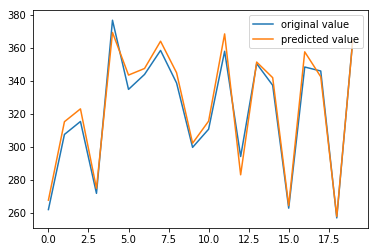

In [141]:
plt.plot(y_test)
plt.plot(predict)
plt.legend(['original value','predicted value'],loc='upper right')

plt.show()